<a href="https://colab.research.google.com/github/paramak23/pkdataworks_ring_analysis/blob/main/Ring_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cheminformatics_project_1: Ring_Analysis

##Installing RDKit Packages



In [22]:
!pip install rdkit

##Code for RDKit implementation

In [23]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

##Converting the SMILES to RDkit object

In [24]:
# input_smiles = 'C1(=CC=CC=C1)C1NC(CCC1)C1=CC=CC=C1'
# input_smiles = "C1(=CC=CC=C1)C1NC(CCC1)C1=CC=CC=C1"
input_smiles = 'NC1=CC=CC=C1'
# input_smiles = "C1(CCCCC1)N"
# input_smiles = "N1=CC=CC2=CC=CC=C12"
input_mol_obj = Chem.MolFromSmiles(input_smiles)
print(f'SMILES to RDkit object:\n{input_mol_obj}')

SMILES to RDkit object:


##Converting canonical SMILES from non-canonical SMILES

In [25]:
canonical_smiles = Chem.MolToSmiles(input_mol_obj)
print(f'Non-Canonical SMILES:\n{input_smiles}\n\nCanonical SMILES:\n{canonical_smiles}')

Non-Canonical SMILES:
NC1=CC=CC=C1

Canonical SMILES:
Nc1ccccc1


##Displaying the Chemical structure

Chemical structure of the given NC1=CC=CC=C1:


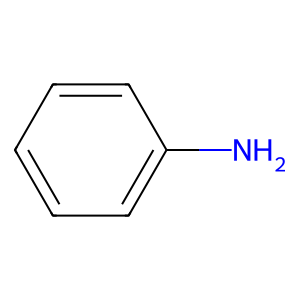

In [26]:
mol_img = Draw.MolToImage(input_mol_obj)
print(f'Chemical structure of the given {input_smiles}:')
display(mol_img)

## Iterating over atoms

In [27]:
for index, atom in enumerate(input_mol_obj.GetAtoms()):
  print(f'Atom Index: {index} | Element: {atom.GetSymbol()}')

Atom Index: 0 | Element: N
Atom Index: 1 | Element: C
Atom Index: 2 | Element: C
Atom Index: 3 | Element: C
Atom Index: 4 | Element: C
Atom Index: 5 | Element: C
Atom Index: 6 | Element: C


##Ring(s) present in the chemical structure

In [28]:
ring_info = input_mol_obj.GetRingInfo()

# Get atom indices for each ring
print(f'Atom Rings: {ring_info.AtomRings()}')

# Count the number of rings
print(f'Total Rings: {len(ring_info.AtomRings())}')


Atom Rings: ((1, 6, 5, 4, 3, 2),)
Total Rings: 1


##Aromatic? or Alicyclic?

In [29]:
for i, ring_tuple in enumerate(ring_info.AtomRings()):
    # Determine if the ring is aromatic
    is_aromatic_ring = True
    for atom_idx in ring_tuple:
        atom = input_mol_obj.GetAtomWithIdx(atom_idx)
        if not atom.GetIsAromatic():
            is_aromatic_ring = False
            break

    ring_smiles = Chem.MolFragmentToSmiles(input_mol_obj, atomsToUse=ring_tuple, kekuleSmiles=False, canonical=True)

    # Print in the desired format
    print(f'Ring_{i+1}: Ring_indices: {ring_tuple}, Ring_smiles: {ring_smiles}, Is_Aromatic: {is_aromatic_ring}')

Ring_1: Ring_indices: (1, 6, 5, 4, 3, 2), Ring_smiles: c1ccccc1, Is_Aromatic: True
